# Van der Pol oscillator


The Van der Pol oscillator was introduced by the Dutch physicist Balthasarvan der Pol.
For more information on the model see
[Wikipedia](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator).

## Dynamics

The dynamics of the Van der Pol oscillator are described by the following ODE with
two variables:

$$
\begin{aligned}
  \dot{x} &= y \\
  \dot{y} &= \mu (1 - x^2) y - x
\end{aligned}
$$
The system has a stable limit cycle however that becomes increasingly sharp
for higher values of ``μ``. We consider the parameter ``μ = 1``.

In [1]:
using ReachabilityAnalysis, Plots

@taylorize function vanderpol!(dx, x, params, t)
    local μ = 1.0
    dx[1] = x[2]
    dx[2] = (μ * x[2]) * (1 - x[1]^2) - x[1]
    return dx
end

## Specification

We set the initial condition ``x(0) ∈ [1.25, 1.55]``, ``y(0) ∈ [2.35,2.45]``.
The *unsafe set* is given by ``y ≥ 2.75`` for a time horizon ``[0, 7]``.
In other words, we would like to prove that there doesn't exist a solution of
the model with a ``y`` value which is greater than 2.75, for any initial condition
on the given domain.

## Results

We proceed by defining the initial conditions as a hyperrectangular set according
to the problem's specifications. Then we build the initial-value problem which
is then passed to the `solve` function. We specify using `TMJets` algorithm with
default options.

In [2]:
X0 = Hyperrectangle(low=[1.25, 2.35], high=[1.55, 2.45])
prob = @ivp(x' = vanderpol!(x), dim=2, x(0) ∈ X0)
sol = solve(prob, T=7.0, alg=TMJets());

For further computations, it is convenient to work with a zonotopic overapproximation
of the flowpipe.

In [3]:
solz = overapproximate(sol, Zonotope);

The maximum value of variable ``y`` is obtained by computing the support function
of the flowpipe along direction ``[0, 1]``:

In [4]:
ρ([0.0, 1.0], solz)

2.7166897124333174

That shows that the property is satisfied. We now plot the flowpipe in the
x-y plane, together with the horizontal line ``y = 2.75``.

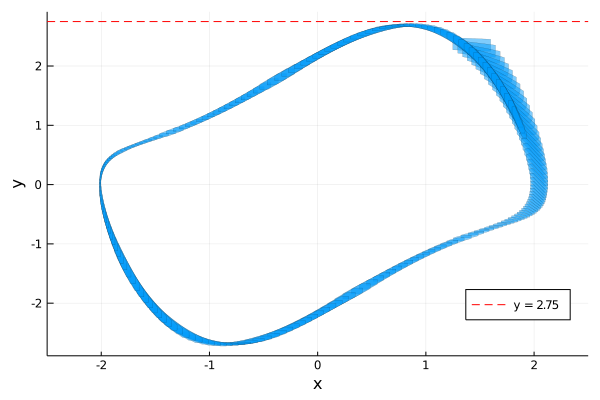

In [5]:
plot(solz, vars=(1, 2), lw=0.2, xlims=(-2.5, 2.5), xlab="x", ylab="y")
plot!(x -> 2.75, color=:red, lab="y = 2.75", style=:dash, legend=:bottomright)

### Limit cycle

We can use the reachability result to examine the limit cycle of the system. In
other words, we can see that the flowpipe re-enters from where it started after
giving one loop. This in fact constitutes a proof that the system has a limit cycle,
and we can prove it using set inclusions.

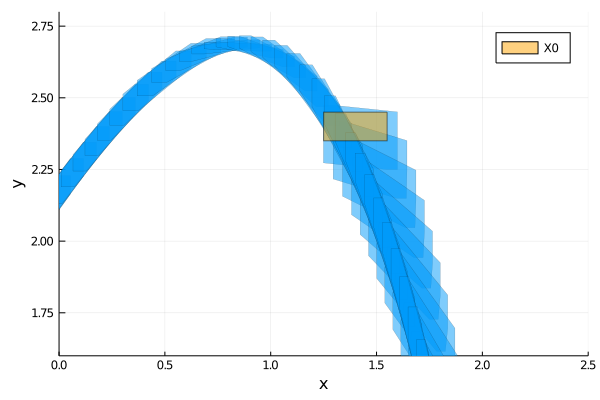

In [6]:
plot(solz, vars=(1, 2), lw=0.2, xlims=(0.0, 2.5), ylims=(1.6, 2.8), xlab="x", ylab="y")
plot!(X0, color=:orange, lab="X0")

### Performance tips

In [7]:
sol = solve(prob, T=7.0, alg=TMJets(orderT=7, orderQ=1))

ReachabilityAnalysis.ReachSolution{Flowpipe{Float64,TaylorModelReachSet{Float64},Array{TaylorModelReachSet{Float64},1}},TMJets{Float64,ReachabilityAnalysis.ZonotopeEnclosure}}(Flowpipe{Float64,TaylorModelReachSet{Float64},Array{TaylorModelReachSet{Float64},1}}(TaylorModelReachSet{Float64}[TaylorModelReachSet{Float64}(TaylorModels.TaylorModel1{TaylorN{Float64},Float64}[  1.4 + 0.15000000000000013 x₁ + ( 2.4000000000000004 + 0.04999999999999982 x₂) t + ( - 1.8519999999999999 - 0.5790000000000006 x₁ - 0.023999999999999907 x₂) t² + ( - 2.4953600000000007 + 0.15656000000000003 x₁ - 0.11265333333333295 x₂) t³ + ( 2.712579733333332 + 1.5787684000000017 x₁ + 0.06217679999999973 x₂) t⁴ + ( 4.130847411200002 - 0.4262746303999998 x₁ + 0.30662400106666565 x₂) t⁵ + ( - 4.92251668090311 - 4.145462185920005 x₁ - 0.16555382950399922 x₂) t⁶ + ( - 7.723309612151961 + 1.0869756105742614 x₁ - 0.7844705202366553 x₂) t⁷ + [-1.19659e-15, 7.6295e-15],   2.4000000000000004 + 0.04999999999999982 x₂ + ( - 3.7039